## Simulator: A python class which simulates PV faults in IV curves

### Step 1: Start off by instantiating the object.

In [1]:
import sys
sys.path.append('..')
IV_path = os.path.join('..', 'pvops', 'iv')
sys.path.append(IV_path)

from pvops.iv import simulator, extractor

sim = simulator.Simulator()

## Step 2: Definition of Faults

Two methods exist to define a fault.
1. Use a preexisting definition (defined by authors) by calling 
2. Manually define a fault


## Preset definitions of faults 

        Parameters
        ----------
        fault_name: str
                1) 'complete': entire module has fault_condition (e.g. Full module shading)
                    Requires no other specifications
                    e.g. add_preset_conditions('complete', fault_condition)
                2) 'landscape': entire rows are affected by fault_condition (e.g. interrow shading)
                    Requires specification of rows_aff
                    e.g. add_preset_conditions('landscape', fault_condition, rows_aff = 2)
                3) 'portrait': entire columns are affected by fault_condition (e.g. vegetation growth shading)
                    Requires specification of cols_aff
                    e.g. add_preset_conditions('portrait', fault_condition, cols_aff = 2)
                4) 'pole': Place pole shadow over module
                    Requires specification of width (integer), which designates the width of main shadow and \\
                    requires light_shading fault_condition specification which specifies less intense shading \\
                    on edges of shadow
                    Optional: pos = (left, right) designates the start and end of the pole shading,
                              where left is number in the first column and right is number in last column
                        if pos not specified, the positions are chosen randomly
                    e.g. add_preset_conditions('pole', fault_condition, light_shading = light_fault_condition, width = 2, pos = (5, 56))
                5) 'bird_droppings': Random positions are chosen for bird_dropping simulations
                    Optional specification is n_droppings. If not specified, chosen as random number between 
                    1 and the number of cells in a column
                    e.g. add_preset_conditions('bird_droppings', fault_condition, n_droppings = 3)
        fault_location: dict
                Same dict as one shown in __init__.
        **kwargs: variables defined by which fault_name you choose, see above

        Tip:
        ----
        For a wider spectrum of cases, run all of these multiple times. Each time it's run, the case is saved 


    

In [2]:
heavy_shading = {'identifier':'heavy_shade',
                   'E': 400,
                   'Tc': 20}
light_shading = {'identifier':'light_shade',
                    'E': 800}
sim.add_preset_conditions('landscape', heavy_shading, rows_aff = 2)
sim.add_preset_conditions('portrait', heavy_shading, cols_aff = 2)
sim.add_preset_conditions('pole', heavy_shading, light_shading = light_shading, width = 2, pos = None)

sim.print_info()

Condition list: (Cell definitions)
	[pristine]: 1 definition(s)
	[heavy_shade]: 1 definition(s)
	[light_shade]: 1 definition(s)

Modcell types: (Cell mappings on module)
	[pristine]: 1 definition(s)
	[landscape_2rows]: 1 definition(s)
	[portrait_2cols]: 1 definition(s)
	[pole_2width]: 1 definition(s)

String definitions (Series of modcells)
	No instances.



## Manual definitions of faults

To define a fault manually, you must provide two specifications:
1. Mapping of cells onto a module, which we deem a _modcell_
2. Definition of cell conditions, stored in _condition_dict_
        Parameters:
        -----------
        modcell: dict
                Key: name of the condition
                Value: list,
                    1D list: Give a single situation for this condition
                    2D list: Give multiple situations for this condition
                    A list where each value signifies a cell's condition
                    See below for example

                    If key is same as an existing key, the list is appended to list of scenarios \\
                    which that key owns
        condition_dict: dict
                    Define the numerical value written in modcell
                    ** If the variable is not defined, values will default to those specified \\
                       in the pristine condition, defined in __init__.
            A full condition is defined as:
                {ID: {'identifier': IDENTIFIER_NAME,
                      'E': IRRADIANCE,
                      'Tc': CELL_TEMPERATURE,
                      'Rsh_mult': RSH_MULTIPLIER,
                      'Rs_mult': RS_MULTIPLIER,
                      'Io_mult': IO_MULTIPLIER,
                      'Il_mult': IL_MULTIPLIER,
                      'nnsvth_mult': NNSVTH_MULTIPLIER 
                }

            condition_dict PARAMETERS:
            --------------------------
                ID: int,
                    Value corresponding to those in modcell
                IDENTIFIER_NAME: str,
                    Name used to define condition
                IRRADIANCE: numerical,
                    Value of irradiance (Watts per meter-squared)
                CELL_TEMPERATURE: numerical,
                    Value of cell temperature (Celcius)
                RSH_MULTIPLIER: numerical,
                    Multiplier usually less than 1 to simulate a drop in Rsh
                RS_MULTIPLIER: numerical,
                    Multiplier usually greater than 1 to simulate increase in Rs
                IO_MULTIPLIER: numerical,
                    Multiplier usually less than 1 to simulate a drop in IO
                IL_MULTIPLIER: numerical,
                    Multiplier usually less than 1 to simulate a drop in IL
                NNSVTH_MULTIPLIER: numerical,
                    Multiplier usually less than 1 to simulate a drop in NNSVTH, and therefore a_ref


In [3]:
modcells = { 'another_example':  [[0,0,0,0,0,0,0,0,0,0,  # Using 2D list (aka, multiple conditions as input)
                                    1,1,1,1,1,1,1,1,1,1,
                                    1,1,1,0,0,0,0,1,1,1, 
                                    1,1,1,0,0,0,0,1,1,1,
                                    1,1,1,0,0,0,0,1,1,1,  
                                    0,0,0,0,0,0,0,0,0,0],

                                  [1,1,1,1,1,1,1,1,1,1,  
                                    0,0,0,0,0,0,0,0,0,0,
                                    0,0,0,1,1,1,1,0,0,0, 
                                    0,0,0,1,1,1,1,0,0,0,
                                    0,0,0,1,1,1,1,0,0,0,  
                                    1,1,1,1,1,1,1,1,1,1]]
            }
condition_dict = {0: {},
                  1: {'identifier': 'heavy_shade',
                      'E': 405,
                     }                              
                 }
sim.add_manual_conditions(modcells, condition_dict)

sim.print_info()

Condition list: (Cell definitions)
	[pristine]: 1 definition(s)
	[heavy_shade]: 2 definition(s)
	[light_shade]: 1 definition(s)

Modcell types: (Cell mappings on module)
	[pristine]: 1 definition(s)
	[landscape_2rows]: 1 definition(s)
	[portrait_2cols]: 1 definition(s)
	[pole_2width]: 1 definition(s)
	[another_example]: 2 definition(s)

String definitions (Series of modcells)
	No instances.



## Step 3: Generate many samples via latin hypercube sampling
    Pass in dictionaries which describe a distribution.
        {PARAMETER: {'mean': MEAN_VAL,
                     'std': STDEV_VAL,
                     'low': LOW_VAL,
                     'upp': UPP_VAL
                    }
        }

    PARAMETER: parameter defined in condition_dict

If all values are provided, a truncated gaussian distribution is used

If _low_ and _upp_ not specified, then a gaussian distribution is used
    

In [4]:
N = 10
dicts = {'E':       {'mean': 400,
                        'std': 500,
                        'low': 200,
                        'upp': 600
                    },
         'Tc':      {'mean': 30,
                      'std': 10,
                    }
        }


sim.generate_many_samples('heavy_shade', N, dicts)

dicts = {'E':       {'mean': 800,
                        'std': 500,
                        'low': 600,
                        'upp': 1000
                    }
        }
sim.generate_many_samples('light_shade', N, distributions = dicts)

sim.print_info()

Condition list: (Cell definitions)
	[pristine]: 1 definition(s)
	[heavy_shade]: 12 definition(s)
	[light_shade]: 11 definition(s)

Modcell types: (Cell mappings on module)
	[pristine]: 1 definition(s)
	[landscape_2rows]: 1 definition(s)
	[portrait_2cols]: 1 definition(s)
	[pole_2width]: 1 definition(s)
	[another_example]: 2 definition(s)

String definitions (Series of modcells)
	No instances.



## Step 4: Define a string as an assimilation of modcells

Define a dictionary with `keys` as the string name and values as a list of module names.

    {STRING_IDENTIFIER: LIST_OF_MODCELL_NAMES}

Use `sim.modcells.keys()` to get list of modules defined thusfar, or look at _modcell types_ list in function call `sim.print_info()`

In [5]:
sim.build_strings({'pole_bottom_mods': ['pristine', 'pristine', 'pristine', 'pristine', 'pristine', 'pristine',
                                            'pole_2width', 'pole_2width', 'pole_2width', 'pole_2width', 'pole_2width', 'pole_2width'],
                   'portrait_2cols_3bottom_mods': ['pristine', 'pristine', 'pristine', 'pristine', 'pristine', 'pristine',
                                            'pristine', 'pristine', 'pristine', 'portrait_2cols', 'portrait_2cols', 'portrait_2cols']})

## Step 5: Simulate!

`sim.simulate()`  simulates all cells, substrings, modules, and strings defined in steps 2 - 4

In [6]:
import time
start_t = time.time()
sim.simulate()
print(f'\nSimulations completed after {round(time.time()-start_t,2)} seconds')

sim.print_info()

Simulating cells:   0%|          | 0/3 [00:00<?, ?it/s]C:\Users\mwhopwo\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\optimize\zeros.py:463: RuntimeWarning: some failed to converge after 100 iterations
  warnings.warn(msg, RuntimeWarning)
Adding up other definitions: 100%|██████████| 5/5 [00:01<00:00,  3.79it/s]
Simulations completed after 16.23 seconds
Condition list: (Cell definitions)
	[pristine]: 1 definition(s)
	[heavy_shade]: 12 definition(s)
	[light_shade]: 11 definition(s)

Modcell types: (Cell mappings on module)
	[pristine]: 1 definition(s)
	[landscape_2rows]: 1 definition(s)
	[portrait_2cols]: 1 definition(s)
	[pole_2width]: 1 definition(s)
	[another_example]: 2 definition(s)

String definitions (Series of modcells)
	[pole_bottom_mods]: 132 definition(s)
	[portrait_2cols_3bottom_mods]: 12 definition(s)




## Step 6: Visualization suite
1) Plot distribution of cell-condition parameter definitions defined in steps 2 and 3

1a) TODO: The truncated gaussians should show cutoff at tails

2) Plot module-level IV curves

3) Plot string-level IV curves

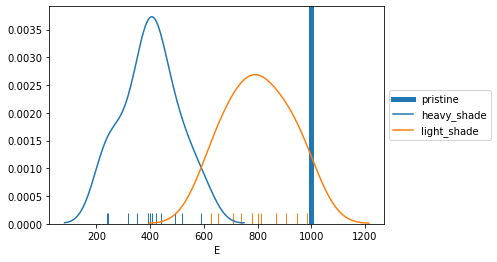

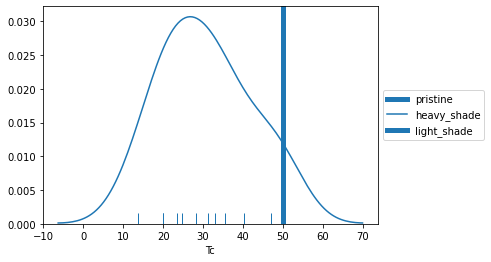

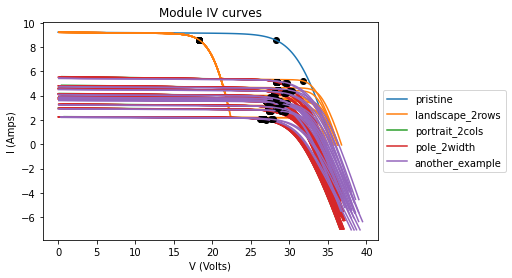

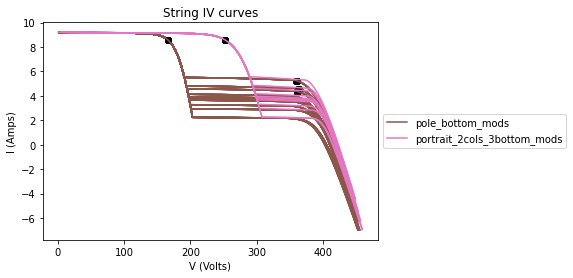

In [7]:
sim.visualize()

### Step 6 cont'd: Visualize cell IV curves and settings

    visualize_cell_level_traces(cell_identifier, cutoff = True, table = True)

Automatically turns off table if the cell_identifier's number of definitions > 20


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EF90F84E0>,
      dtype=object)

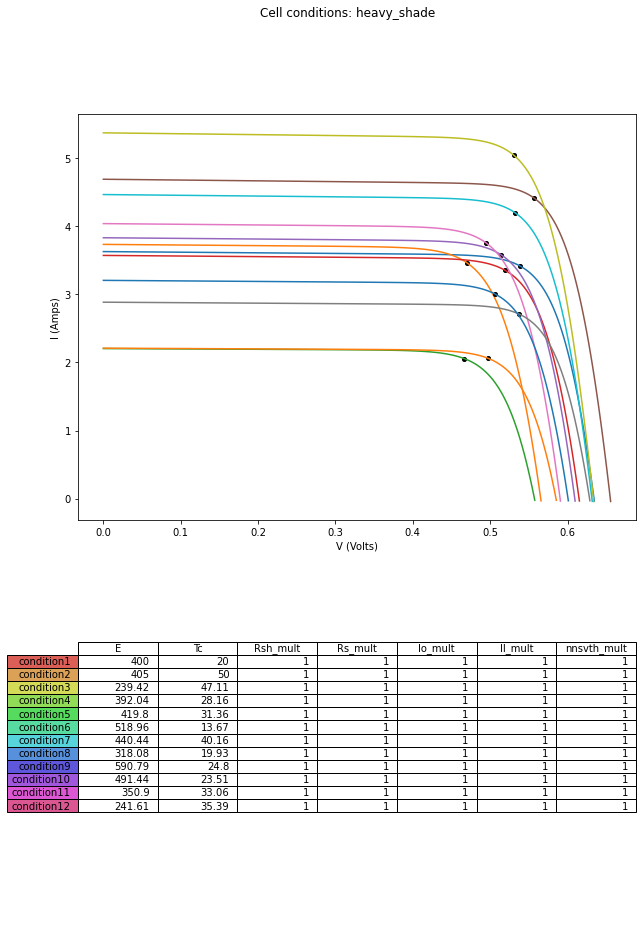

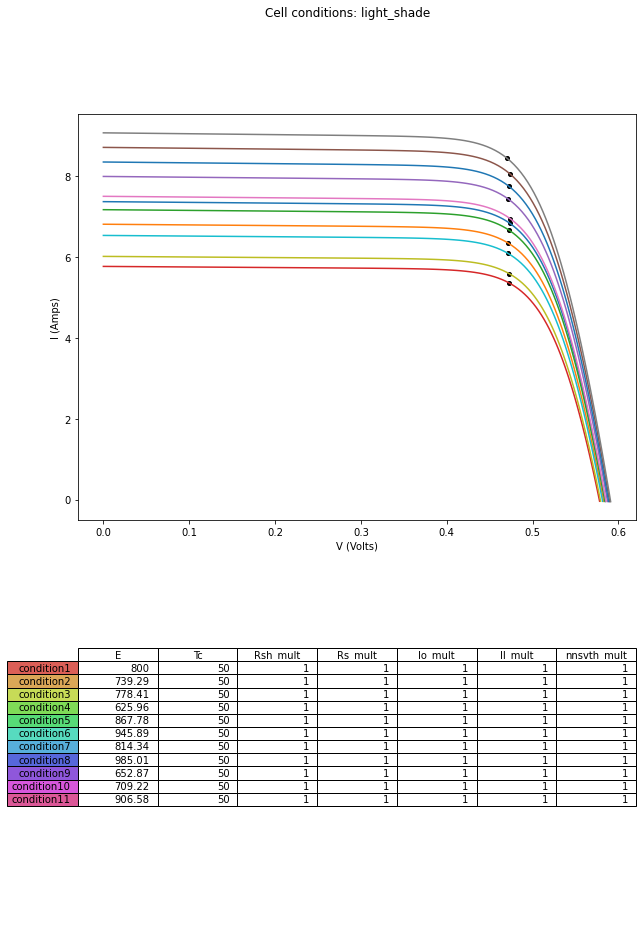

In [8]:
sim.visualize_cell_level_traces('heavy_shade', cutoff = True, table = True)
sim.visualize_cell_level_traces('light_shade', cutoff = True, table = True)

### Step 6 cont'd: Visualize modcells

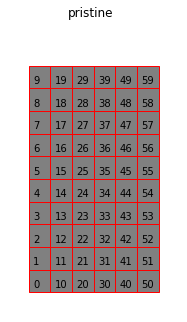

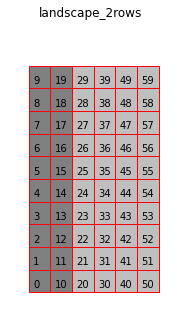

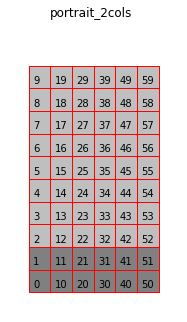

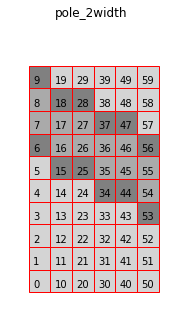

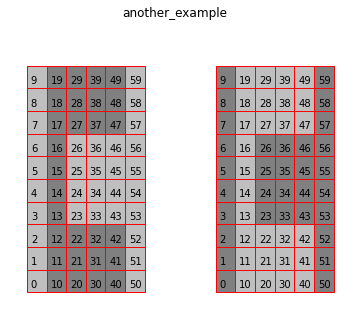

In [9]:
for mod_identifier in sim.modcells.keys():
    sim.visualize_module_configurations(mod_identifier, title = mod_identifier)